<a href="https://colab.research.google.com/github/FernandoCallasaca/data_science_projects/blob/main/Accidentes_de_tr%C3%A1nsito_2020_2021_Datos_Limpios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparamos nuestro entorno

## Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd '/content/drive/My Drive/Data Science/Proyectos/Accidentes de Tránsito 2020-2021/'
!ls

/content/drive/My Drive/Data Science/Proyectos/Accidentes de Tránsito 2020-2021
'Accidentes de tránsito 2020-2021  - Datos Limpios.ipynb'
'Accidentes de tránsito 2020-2021.ipynb'
 Accidentes_de_transito_en_carreteras-2020-2021-Sutran.csv
 accidentes_transito_limpios.csv
 Formato_2_Diccionario_de_datos.docx


In [4]:
path_file = lambda name_file: '/content/drive/My Drive/Data Science/Proyectos/Accidentes de Tránsito 2020-2021/{}'.format(name_file)

## Librerías

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
pd.options.display.float_format = '{:,.3f}'.format

In [9]:
np.set_printoptions(precision = 3)

# Leemos nuestro dataset Limpio

In [10]:
path_file_read = path_file('accidentes_transito_limpios.csv')
path_file_read

'/content/drive/My Drive/Data Science/Proyectos/Accidentes de Tránsito 2020-2021/accidentes_transito_limpios.csv'

In [11]:
df_accidentes = pd.read_csv(path_file_read)
df_accidentes

,DEPARTAMENTO,CODIGO_VÍA,KILOMETRO,MODALIDAD,FALLECIDOS,HERIDOS,FECHA-ACCIDENTE
0,LIMA,PE-1S,24,DESPISTE,0,0,2020-01-01 05:40:00
1,CAJAMARCA,PE-3N,74,DESPISTE,0,0,2020-01-01 16:30:00
2,PASCO,PE-3N,103,DESPISTE,0,1,2020-01-01 07:45:00
3,CAJAMARCA,PE-08,111,DESPISTE,0,2,2020-01-01 18:30:00
4,LIMA,PE-1N,174,DESPISTE,0,5,2020-01-01 18:40:00
...,...,...,...,...,...,...,...
7945,ANCASH,PE-1N,348,CHOQUE,0,0,2021-09-30 01:30:00
7946,MADRE DE DIOS,PE-30C,417,CHOQUE,0,0,2021-09-30 04:00:00
7947,LA LIBERTAD,PE-1N,627,CHOQUE,0,2,2021-09-30 15:10:00
7948,LAMBAYEQUE,PE-1N,758,DESPISTE,0,0,2021-09-30 02:50:00


In [12]:
df_accidentes.corr()

,KILOMETRO,FALLECIDOS,HERIDOS
KILOMETRO,1.000,0.012,0.015
FALLECIDOS,0.012,1.000,0.299
HERIDOS,0.015,0.299,1.000


(0.0, 74.55)

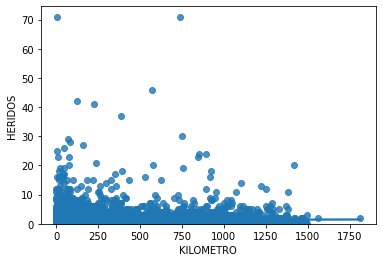

In [22]:
sns.regplot(x = 'KILOMETRO', y = 'HERIDOS', data = df_accidentes)
plt.ylim(0,)

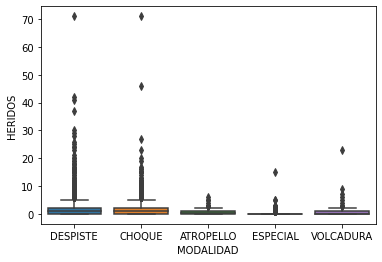

In [14]:
sns.boxplot(x = 'MODALIDAD', y = 'HERIDOS', data = df_accidentes)

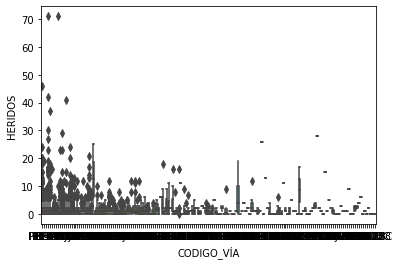

In [23]:
sns.boxplot(x = 'CODIGO_VÍA', y = 'HERIDOS', data = df_accidentes)

In [15]:
df_dummies_modalidad = pd.get_dummies(df_accidentes['MODALIDAD'])
df_dummies_modalidad

,ATROPELLO,CHOQUE,DESPISTE,ESPECIAL,VOLCADURA
0,0,0,1,0,0
1,0,0,1,0,0
2,0,0,1,0,0
3,0,0,1,0,0
4,0,0,1,0,0
...,...,...,...,...,...
7945,0,1,0,0,0
7946,0,1,0,0,0
7947,0,1,0,0,0
7948,0,0,1,0,0


In [30]:
# agrupamos por modalidad
df_accidentes.groupby(['MODALIDAD'])[['FALLECIDOS', 'HERIDOS']].sum().reset_index()

,MODALIDAD,FALLECIDOS,HERIDOS
0,ATROPELLO,155,232
1,CHOQUE,663,5172
2,DESPISTE,505,4759
3,ESPECIAL,18,81
4,VOLCADURA,8,121


In [35]:
df_accidentes.groupby(['DEPARTAMENTO']).mean().sort_values(by = ['HERIDOS'], ascending = False)

,KILOMETRO,FALLECIDOS,HERIDOS
DEPARTAMENTO,,,
LAMBAYEQUE,411.925,0.161,1.731
AYACUCHO,223.743,0.293,1.671
APURIMAC,512.613,0.226,1.623
PASCO,119.080,0.160,1.613
HUANCAVELICA,113.984,0.311,1.557
CUSCO,497.086,0.151,1.538
TUMBES,246.000,0.304,1.478
ICA,266.118,0.209,1.421
LA LIBERTAD,465.434,0.352,1.418


In [38]:
df_accidentes.groupby('DEPARTAMENTO', as_index = False)[['FALLECIDOS', 'HERIDOS']].sum().sort_values(by = 'FALLECIDOS', ascending = False)

,DEPARTAMENTO,FALLECIDOS,HERIDOS
14,LIMA,196,1678
3,AREQUIPA,138,1003
20,PUNO,117,672
12,LA LIBERTAD,112,451
11,JUNIN,100,869
1,ANCASH,85,744
19,PIURA,80,436
10,ICA,78,530
13,LAMBAYEQUE,54,580
4,AYACUCHO,49,279


In [39]:
df_accidentes['UNOS'] = 1

In [40]:
df_accidentes

,DEPARTAMENTO,CODIGO_VÍA,KILOMETRO,MODALIDAD,FALLECIDOS,HERIDOS,FECHA-ACCIDENTE,UNOS
0,LIMA,PE-1S,24,DESPISTE,0,0,2020-01-01 05:40:00,1
1,CAJAMARCA,PE-3N,74,DESPISTE,0,0,2020-01-01 16:30:00,1
2,PASCO,PE-3N,103,DESPISTE,0,1,2020-01-01 07:45:00,1
3,CAJAMARCA,PE-08,111,DESPISTE,0,2,2020-01-01 18:30:00,1
4,LIMA,PE-1N,174,DESPISTE,0,5,2020-01-01 18:40:00,1
...,...,...,...,...,...,...,...,...
7945,ANCASH,PE-1N,348,CHOQUE,0,0,2021-09-30 01:30:00,1
7946,MADRE DE DIOS,PE-30C,417,CHOQUE,0,0,2021-09-30 04:00:00,1
7947,LA LIBERTAD,PE-1N,627,CHOQUE,0,2,2021-09-30 15:10:00,1
7948,LAMBAYEQUE,PE-1N,758,DESPISTE,0,0,2021-09-30 02:50:00,1


In [44]:
df_accidentes.rename(columns = {'UNOS': 'CANT-ACCIDENTES'}, inplace = True)

In [50]:
df_departamento_count = df_accidentes.groupby('DEPARTAMENTO', as_index = False)[['CANT-ACCIDENTES', 'HERIDOS', 'FALLECIDOS']].sum().sort_values(by = 'DEPARTAMENTO', ascending = True)
df_departamento_count

,DEPARTAMENTO,CANT-ACCIDENTES,HERIDOS,FALLECIDOS
0,AMAZONAS,150,201,17
1,ANCASH,592,744,85
2,APURIMAC,199,323,45
3,AREQUIPA,786,1003,138
4,AYACUCHO,167,279,49
5,CAJAMARCA,338,422,32
6,CALLAO,6,8,1
7,CUSCO,325,500,49
8,HUANCAVELICA,61,95,19
9,HUANUCO,168,163,23


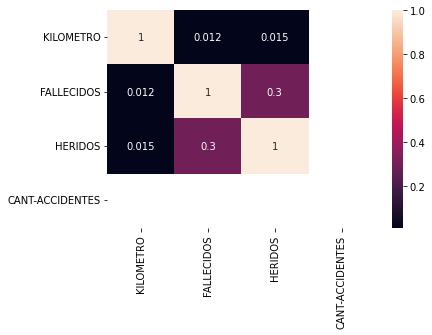

In [52]:
sns.heatmap(df_accidentes.corr(), annot=True)

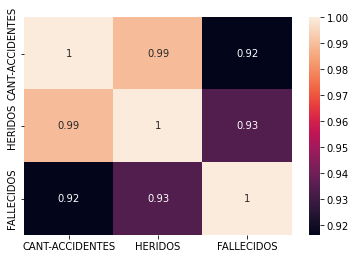

In [53]:
sns.heatmap(df_departamento_count.corr(), annot = True)

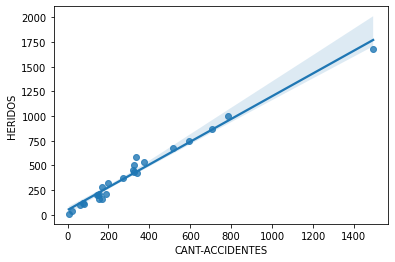

In [55]:
sns.regplot(x = 'CANT-ACCIDENTES', y = 'HERIDOS', data = df_departamento_count)

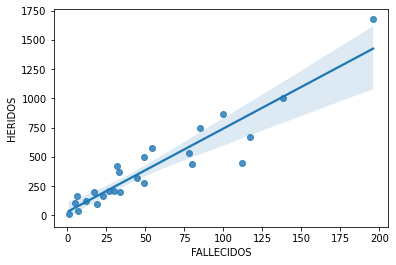

In [56]:
sns.regplot(x = 'FALLECIDOS', y = 'HERIDOS', data = df_departamento_count)

In [57]:
from scipy import stats

In [61]:
coef, p_value = stats.pearsonr(df_departamento_count['FALLECIDOS'], df_departamento_count['HERIDOS'])
print('Coeficiente de Pearson: {0} - P-value: {1}'.format(coef, p_value))

Coeficiente de Pearson: 0.9342396848330324 - P-value: 8.807505501379186e-12
